<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%B0%D1%87_%D0%A1%D0%92%D0%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение необходимых библиотек

In [ ]:
!pip install scikit-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.constants as const
import scipy.optimize as opt
import scipy.special as sp
import scipy.integrate
import scipy.signal as sig

from math import sqrt,sin,tan,cos,pi,radians,degrees,log,log10,atan,exp

import sympy

import numpy as np

import matplotlib.pyplot as plt

import skrf as rf
rf_math = rf.mathFunctions



import plotly
import plotly.graph_objs as go
import plotly.express as px

import IPython.display

# Исходное ТЗ

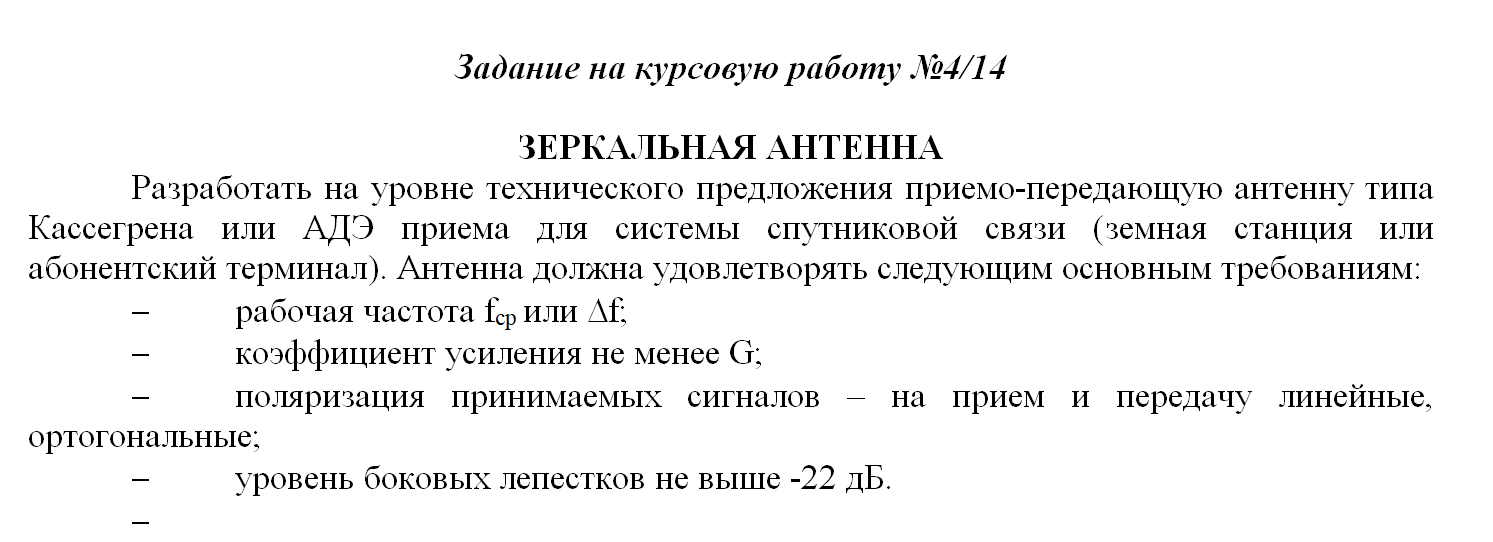

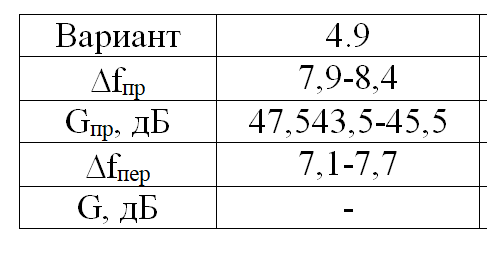

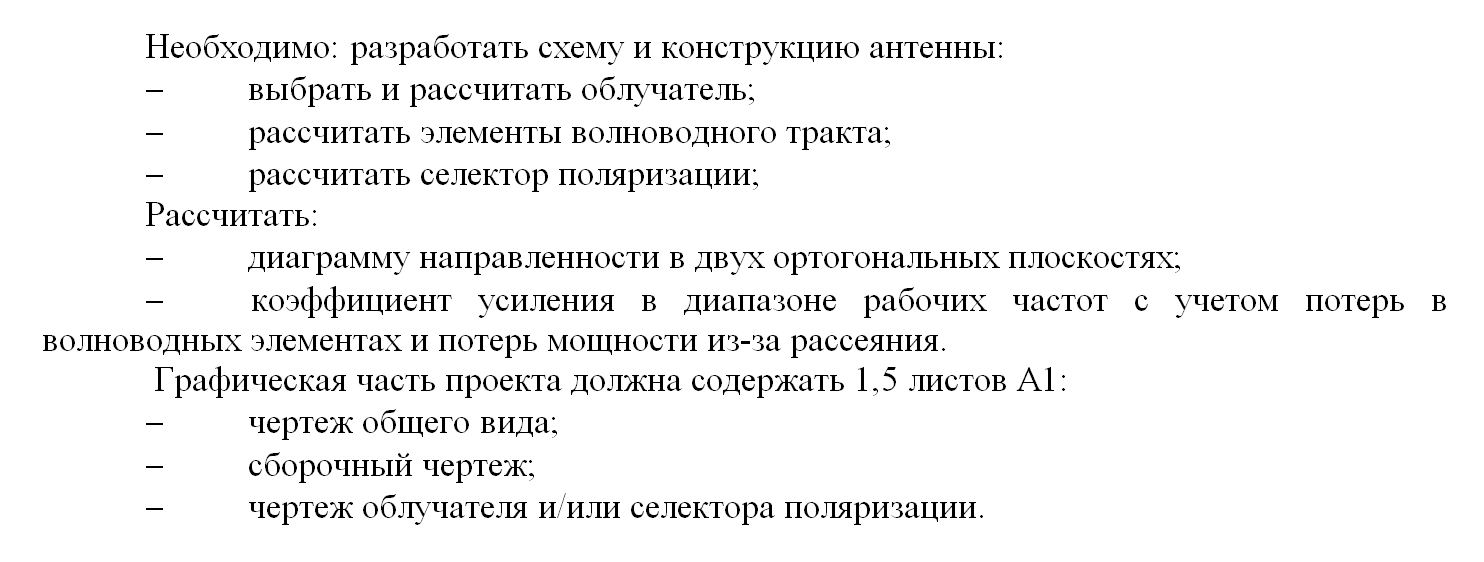

Зададим начальные условия расчета

In [ ]:
#f_lim = 8.3e9 #задаем частоту на заданном интервале
f_lim = 8.3e9
f_l = 7.9e9
f_h = 8.4e9
nu = 0.5 #КИП
G_lim_dB = 36 #КУ в дБ
f_lim = f_h

Пересчитаем краевые условия на частоты и соответствующие им длинны волн.

In [ ]:
IPython.display.Markdown(f"$\huge f_н = {f_l/1e9} [ГГц] $")

$\huge f_н = 7.9 [ГГц] $

In [ ]:
IPython.display.Markdown("$\huge \lambda_н = {{c}\over{f_н}} = %i * 10^{-3} [м]$"%(const.c/f_l * 1e3))

$\huge \lambda_н = {{c}\over{f_н}} = 37 * 10^{-3} [м]$

In [ ]:
IPython.display.Markdown(f"$\huge f_в = {f_h/1e9} [ГГц] $")

$\huge f_в = 8.4 [ГГц] $

In [ ]:
IPython.display.Markdown("$\huge \lambda_в = {{c}\over{f_в}} = %i * 10^{-3} [м]$"%(const.c/f_h * 1e3))

$\huge \lambda_в = {{c}\over{f_в}} = 35 * 10^{-3} [м]$

Для того, чтобы имело смысл использовать двухзеркальную антенну, необходимо чтобы удовлетворялось неравенство.

$$\frac{D_0}{d_0} \geq 5$$

# Расчет размеров антенны

In [ ]:
#Функция перевода из дБ в разы
From_dB_10 = lambda x: 10**(x/10)

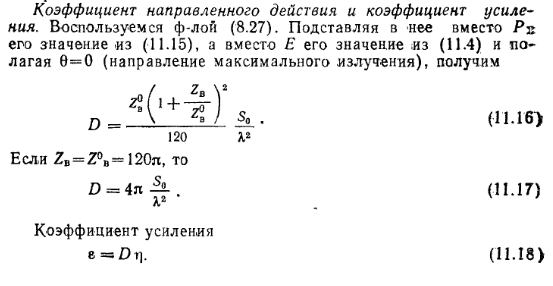

Для расчетов возьмем промежуточное значение частоты, например 

In [ ]:
IPython.display.Markdown(f"$\huge f = {f_lim/1e9} [ГГц] $")

$\huge f = 8.4 [ГГц] $

In [ ]:
IPython.display.Markdown("$\huge \lambda = {{c}\over{f}} = %i * 10^{-3} [м]$"%(const.c/f_h * 1e3))

$\huge \lambda = {{c}\over{f}} = 35 * 10^{-3} [м]$

Найдем площадь, а затем диаметр излучателя используя КУ

In [ ]:
G_lim = From_dB_10(G_lim_dB) #переводим КУ из дБ в разы
lambda_lim = const.c/f_lim #считаем соответвсующую длинну волны


S = G_lim*lambda_lim**2/(4*const.pi*nu)
D = sqrt(4*S/(const.pi)) 
D_0 = D

In [ ]:
S

0.8070546894833865

$$ S = \pi R^{2} = \pi  \frac{D_0^{2}}{4} $$
$$ D = 4 \pi {{S}\over{\lambda^2}} $$
$$G = \nu D$$

Теперь иcпользуем равенства выше и примем КИП ν = 0.5, для выражения КУ через КНД.

$$ S_0 = \frac{G\lambda^2}{4\pi\nu} $$

In [ ]:
IPython.display.Markdown("$\huge S = {{G \cdot \lambda^2}\over{(4\pi \cdot \nu)}} = %i [мм] $"%(S*1e3))

$\huge S = {{G \cdot \lambda^2}\over{(4\pi \cdot 
u)}} = 807 [мм] $

Диаметр найдем, исходя из того, что раскрыв это круг, соответсвующей площади.

In [ ]:
IPython.display.Markdown("$\huge D_0 = \sqrt[2]{4\cdot{{S}\over{\pi}}}  = %i [мм]  $"%(D*1e3))

$\huge D_0 = \sqrt[2]{4\cdot{{S}\over{\pi}}}  = 1013 [мм]  $

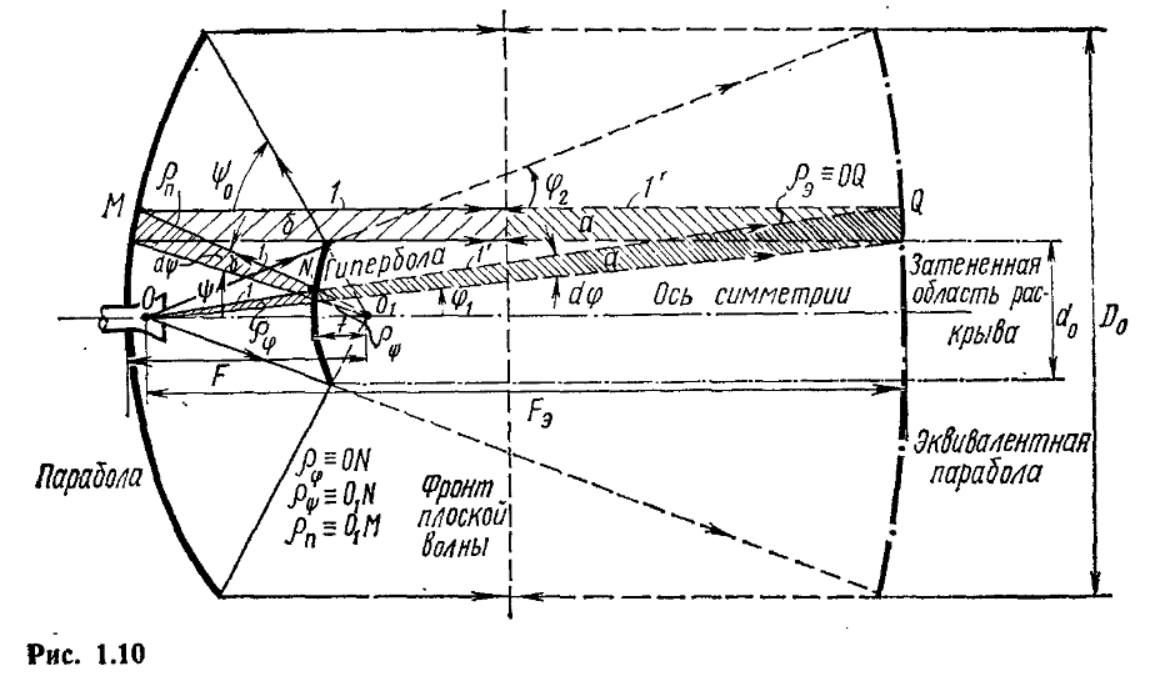

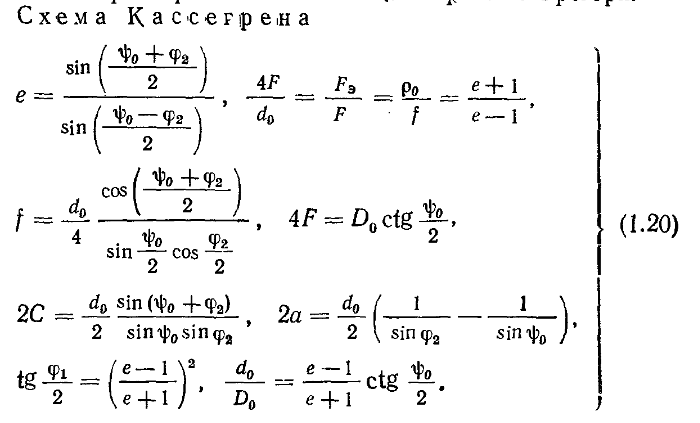

In [ ]:
#psi_0 = rf_math.degree_2_radian(78.19)
#varphi_2 = rf_math.degree_2_radian(15)

#задаем начальные значения произвольно
# 87,10
# 87 20
psi_0 = rf_math.degree_2_radian(89)
varphi_2 = rf_math.degree_2_radian(20)

#проводим вычисления параметров антенны
e = sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2)
d_0 = D_0*(e - 1)/(e + 1)*1/tan(psi_0/2)
f = d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2))
F = D_0/(4*tan(psi_0/2))
F_eqv = 4*F**2/d_0

Подберем эти значения согласно шрафику ниже.

In [ ]:
IPython.display.Markdown(f"$\huge \psi_0 = {round(degrees(psi_0),3)} [град]$")

$\huge \psi_0 = 89.0 [град]$

In [ ]:
IPython.display.Markdown(f"$\huge \phi_2 = {round(degrees(varphi_2),3)} [град]$")

$\huge \phi_2 = 20.0 [град]$

In [ ]:
IPython.display.Markdown("$\huge e = {{{{sin(\psi_0 + \phi_2)}\over{2}}}\over{sin({{\psi_0 - \phi_2}\over{2}})}} = %i . %i $"%(e,e*1e3%1e3))

$\huge e = {{{{sin(\psi_0 + \phi_2)}\over{2}}}\over{sin({{\psi_0 - \phi_2}\over{2}})}} = 1 . 437 $

In [ ]:
IPython.display.Markdown("$\huge d_0 = D_0 \cdot {(e - 1)\over(e + 1)} \cdot {{1}\over{tan(\psi_0/2)}} = %i [мм] $"%(d_0*1e3))

$\huge d_0 = D_0 \cdot {(e - 1)\over(e + 1)} \cdot {{1}\over{tan(\psi_0/2)}} = 185 [мм] $

In [ ]:
IPython.display.Markdown("$\huge f = d_0 \cdot {{cos({{\psi_0 + \phi_2}\over{2}})}\over{(4 \cdot sin(\psi_0/2) \cdot cos(\phi_2/2))}} = %i [мм] $"%(f*1e3))

$\huge f = d_0 \cdot {{cos({{\psi_0 + \phi_2}\over{2}})}\over{(4 \cdot sin(\psi_0/2) \cdot cos(\phi_2/2))}} = 38 [мм] $

In [ ]:
IPython.display.Markdown("$\huge F = {{D_0}\over{(4 \cdot tan(\psi_0/2))}} = %i [мм] $"%(F*1e3))

$\huge F = {{D_0}\over{(4 \cdot tan(\psi_0/2))}} = 257 [мм] $

In [ ]:
IPython.display.Markdown("$\huge F_{э} = {{4F^2}\over{d_0}} =  %i [мм] $"%(F_eqv*1e3))

$\huge F_{э} = {{4F^2}\over{d_0}} =  1437 [мм] $

In [ ]:
#проверяем условия
[
 e == sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2),
4*F/d_0 == F_eqv/F,
 f == d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2)),
 4*F == D_0/(tan(psi_0/2)),
 d_0/D_0 == (e - 1)/(e + 1)*1/tan(psi_0/2)
]

[True, True, True, True, True]

In [ ]:
IPython.display.Markdown("$\huge {{D_0}\over{d_0}} =  %i $"%(D_0/d_0))

$\huge {{D_0}\over{d_0}} =  5 $

In [ ]:
#найдем соотношения
D_0/d_0

5.476722320401575

In [ ]:
#задание кртвой второго порядка
second_order_curve = lambda f,e,psi: f*(1 + e)/(1 + e*cos(psi))

#конвертация координат из полярной СК в декартову(прямоугольную)
def RPhi_to_XY(r,phi):
  return {"x":r*cos(phi),
          "y":r*sin(phi)}

#задание углов раствора зеркал
angel_of_mirror = lambda x,phi: tan(phi)*x 

In [ ]:
#задаем данные раствора углов для
#малого и большого зеркал антенны
psi_d = np.linspace(-psi_0,psi_0,1000)
#эквивалентного зеркала антенны
psi_d_phi = np.linspace(-varphi_2,varphi_2,1000) 

In [ ]:
#вычисляем данные малого зеркала в полярной СК и переводим в Декартову
small_mirror_d = np.vectorize(second_order_curve)(f,e,psi_d)
small_mirror_d = np.vectorize(RPhi_to_XY)(small_mirror_d,psi_d)

small_mirror_d_x = np.array([i["x"] for i in small_mirror_d])
small_mirror_d_y = np.array([i["y"] for i in small_mirror_d])

In [ ]:
#вычисляем данные большого зеркала в полярной СК и переводим в Декартову
big_mirror_d = np.vectorize(second_order_curve)(F,e,psi_d)
big_mirror_d = np.vectorize(RPhi_to_XY)(big_mirror_d,psi_d)

big_mirror_d_x = np.array([i["x"] for i in big_mirror_d])
big_mirror_d_y = np.array([i["y"] for i in big_mirror_d])

In [ ]:
#вычисляем данные эквивалентного зеркала в полярной СК и переводим в Декартову
eqv_mirror_d = np.vectorize(second_order_curve)(F_eqv,e,psi_d_phi)
eqv_mirror_d = np.vectorize(RPhi_to_XY)(eqv_mirror_d ,psi_d_phi)

eqv_mirror_d_x = np.array([i["x"] for i in eqv_mirror_d])
eqv_mirror_d_y = np.array([i["y"] for i in eqv_mirror_d])

In [ ]:
#вычисляем данные углов экивалентного зеркала
eqv_mirror_angel_x = np.linspace(0,F_eqv,100)
eqv_mirror_angel_y = np.vectorize(angel_of_mirror)(eqv_mirror_angel_x,varphi_2)

#вычисляем данные углов основного зеркала
main_mirror_angel_x = np.linspace(0,F,100)
main_mirror_angel_y = np.vectorize(angel_of_mirror)(main_mirror_angel_x,pi - psi_0)

In [ ]:
#вычислим положение фокус эквивалентного зеркала
data_for_eqv_focus = (second_order_curve(f,e,psi_0))
focus_of_eqv_mirror = F - RPhi_to_XY(data_for_eqv_focus,psi_0)["x"] - RPhi_to_XY(data_for_eqv_focus,psi_0)["y"]/tan(varphi_2)

In [ ]:
#найдем координаты концов зеркал
end_of_small_mirror = F - RPhi_to_XY(second_order_curve(f,e,psi_0),psi_0)["x"] 
end_of_big_mirror = F - RPhi_to_XY(second_order_curve(F,e,psi_0),psi_0)["x"] 
end_of_eqv_mirror = focus_of_eqv_mirror + RPhi_to_XY(second_order_curve(F_eqv,e,varphi_2),varphi_2)["x"] 

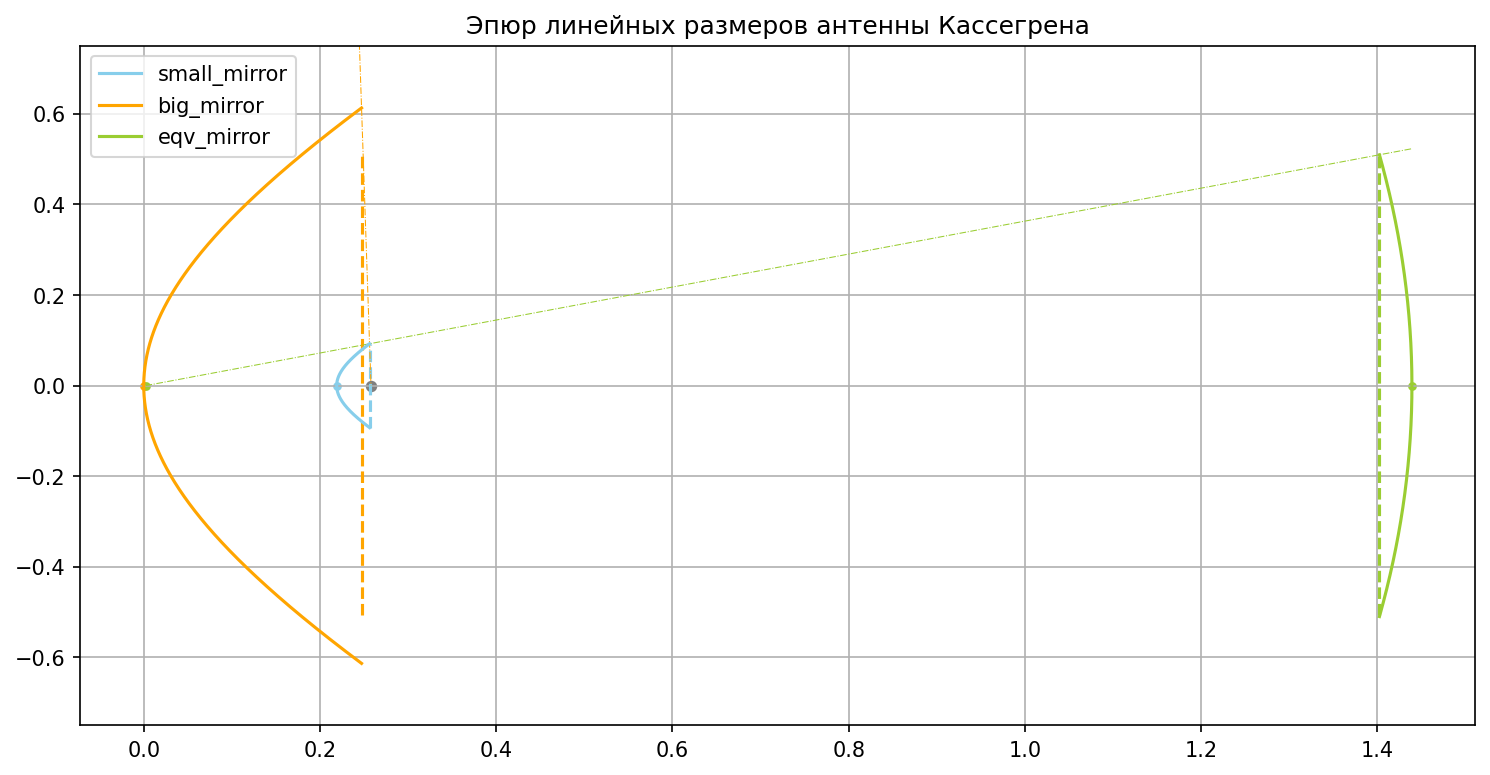

In [ ]:
%matplotlib inline
plt.figure(dpi = 150,figsize = (12,6))
plt.title("Эпюр линейных размеров антенны Кассегрена")
#задаем фокусные расстояния
#plt.scatter([F,0,focus_of_eqv_mirror + F_eqv,F - f,focus_of_eqv_mirror],
#            [0,0,0                          ,0    ,0],
#            s = 10,
#            )

plt.scatter([0],
            [0],
            s = 10,
            color = "orange",
            )


plt.scatter([focus_of_eqv_mirror + F_eqv,focus_of_eqv_mirror],
            [0                          ,0],
            s = 10,
            color = "YellowGreen",
            )


plt.scatter([F - f],
            [0    ],
            s = 10,
            color = "skyblue",
            )


plt.scatter([F],
            [0],
            s = 20,
            color = "gray",
            )


#задаем высоту зеркал


#plt.vlines(0,-1*D_0/2,D_0/2,
#           color = "orange",
#           linestyles = "--",
#           )
#plt.vlines(F,-1*d_0/2,d_0/2,
#           color = "skyblue",
#           linestyles = "--",
#           )
#plt.vlines(focus_of_eqv_mirror + F_eqv,-1*D_0/2,D_0/2,
#           color = "YellowGreen",
#           linestyles = "--",
#           )


#контрольная линия для проверки расчетов
plt.vlines(end_of_small_mirror,-1*d_0/2,d_0/2,
           color = "skyblue",
           linestyles = "--",
           )

plt.vlines(end_of_big_mirror,-1*D_0/2,D_0/2,
           color = "orange",
           linestyles = "--",
           )

plt.vlines(end_of_eqv_mirror,-1*D_0/2,D_0/2,
           color = "YellowGreen",
           linestyles = "--",
           )


#задаем углы зеркал

plt.plot(eqv_mirror_angel_x + focus_of_eqv_mirror,
         eqv_mirror_angel_y,
         color = "YellowGreen",
         linestyle = "dashdot",
         linewidth = 0.5,
         )

plt.plot(main_mirror_angel_x,
         main_mirror_angel_y + tan(psi_0)*F,
         color = "orange",
         linestyle = "dashdot",
         linewidth = 0.5,
         )




#задаем зеркала
plt.plot(-1*small_mirror_d_x + F,
         small_mirror_d_y,
         color = "skyblue",
         label = "small_mirror",
         )

plt.plot(-1*big_mirror_d_x + F,
         big_mirror_d_y,
         color = "orange",
         label = "big_mirror",
         )

plt.plot(eqv_mirror_d_x + focus_of_eqv_mirror,
         eqv_mirror_d_y,
         color = "YellowGreen",
         label = "eqv_mirror",
         )

plt.ylim([-0.75,0.75])
plt.legend()
plt.grid(True)


In [ ]:
fig = go.Figure(layout_yaxis_range=[-0.75,0.75])

#задаем фокусные расстояния
fig.add_trace(go.Scatter(x=[0],
                         y=[0],
                         marker = {'color' : 'orange'}))

fig.add_trace(go.Scatter(x=[focus_of_eqv_mirror + F_eqv,focus_of_eqv_mirror],
                         y=[0,0],
                         mode="markers",
                         marker = {'color' : 'YellowGreen'}))

fig.add_trace(go.Scatter(x=[F - f],
                         y=[0],
                         mode="markers",
                         marker = {'color' : 'skyblue'}))

fig.add_trace(go.Scatter(x=[F],
                         y=[0],
                         mode="markers",
                         marker = {'color' : 'gray'}))


#контрольная линия для проверки расчетов

fig.add_trace(go.Scatter(x=[end_of_small_mirror, end_of_small_mirror], 
                         y=[-1*d_0/2,d_0/2],  
                         line_dash="dash",
                         marker = {'color' : 'skyblue'}))
fig.add_trace(go.Scatter(x=[end_of_big_mirror, end_of_big_mirror], 
                         y=[-1*D_0/2,D_0/2], 
                         line_dash="dash",
                         marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=[end_of_eqv_mirror,end_of_eqv_mirror],
                         y=[-1*D_0/2,D_0/2],
                        line_dash="dash",
                         marker = {'color' : 'YellowGreen'}))



#задаем зеркала
fig.add_trace(go.Scatter(x=-1*small_mirror_d_x + F, 
                         y=small_mirror_d_y,  
                         name='small_mirror',
                         marker = {'color' : 'skyblue'}))
fig.add_trace(go.Scatter(x=-1*big_mirror_d_x + F, 
                         y=big_mirror_d_y, 
                         name='big_mirror',
                         marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=eqv_mirror_d_x + focus_of_eqv_mirror,
                         y=eqv_mirror_d_y,
                         name='eqv_mirror',
                         marker = {'color' : 'YellowGreen'}))


#задаем углы зеркал

fig.add_trace(go.Scatter(x=eqv_mirror_angel_x + focus_of_eqv_mirror, 
                         y=eqv_mirror_angel_y, 
                         line_dash="dash",
                         marker = {'color' : 'YellowGreen'}))
fig.add_trace(go.Scatter(x=main_mirror_angel_x,
                         y=main_mirror_angel_y + tan(psi_0)*F,
                         line_dash="dash",
                         marker = {'color' : 'orange'}))




fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Эпюр линейных размеров антенны Кассегрена",
                  xaxis_title="Ox [м]",
                  yaxis_title="Oy [м]",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [ ]:
import IPython.display
fr = 2
IPython.display.Markdown("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

In [ ]:
from IPython.display import Markdown as md
fr = 2
md("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

$f_r = 2 + Γ$

# Расчет облучателя

## Расчет основных параметров облучателя

In [ ]:
K = 2*const.pi/lambda_lim
Z_oc = 377
Z = Z_oc/sqrt(1)

## Расчет ДН облучателя

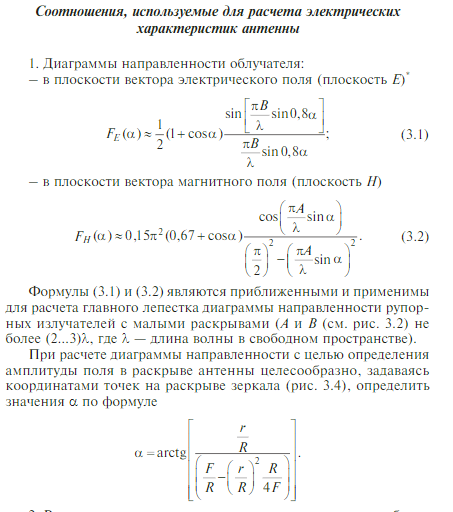

In [ ]:
#задаем ДН облучаетеля
F_E = lambda alpha, B: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
F_H = lambda alpha, A: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)

$$ F_E(\alpha) = \frac{1}{2} \cdot (1 + cos(\alpha)) \cdot \frac{sin((\pi \cdot B)/(\lambda) \cdot sin(0.8 \cdot \alpha))}{(\pi \cdot B/\lambda \cdot sin(0.8 \cdot \alpha))} $$


$$ F_H(\alpha) =  0.15 \cdot \pi^2 \cdot (0.67 + cos(\alpha)) \cdot \frac{cos(\pi \cdot A/\lambda \cdot sin(\alpha))}{((\pi/2)^2 - (\pi \cdot A/\lambda \cdot sin(\alpha))^2)} $$

In [ ]:
tol = 1e-3 #точность решения
dB_for_irradiator = -10 #задаем в дб нормировочный размер для излучателя
#задаем уравнение для поиска размеров рупора
F_E_B = lambda B: 20*log(F_E(varphi_2,B)) - dB_for_irradiator
#F_E_B(89*const.milli)
B = opt.root(F_E_B,100*const.milli,tol = tol)["x"][0]
B #
#B = 150e-3

0.06587781664897406

In [ ]:
IPython.display.Markdown(f"$\huge B = {round(B,3)} [м]$")

$\huge B = 0.066 [м]$

In [ ]:
#задаем уравнение для поиска размеров рупора
F_H_A = lambda A: 20*log(F_H(varphi_2,A)) - dB_for_irradiator
#F_H_A(89*const.milli)
A = opt.root(F_H_A,100*const.milli,tol = tol)["x"][0]
A #
#A = 200e-3

0.07126291745196664

In [ ]:
IPython.display.Markdown(f"$\huge A = {round(A,3)} [м]$")

$\huge A = 0.071 [м]$

In [ ]:
#переобьявляем ДН с учетом размера рупора
#A = 20*const.milli
#B = 20*const.milli
#F_E = lambda alpha: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
#F_H = lambda alpha: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning:

invalid value encountered in log



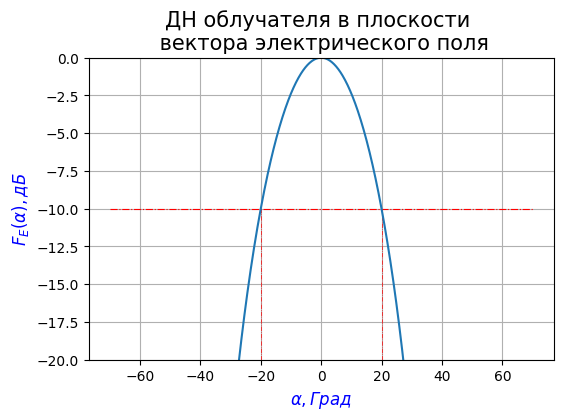

In [ ]:
alpha = np.linspace(radians(-70),radians(+70),1000)
conv_alpha = list(map(degrees,alpha))
y_lim_min = dB_for_irradiator*2


plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(dB_for_irradiator,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot((conv_alpha), 20*np.log(np.vectorize(F_E)(alpha,B)), label='$F_E(\alpha)$')



plt.title("ДН облучателя в плоскости \n вектора электрического поля", fontsize=15)
plt.xlabel('$α, Град$', fontsize=12, color='blue')
plt.ylabel('$F_E(α), дБ$', fontsize=12, color='blue')

plt.ylim([y_lim_min,0])
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')

In [ ]:
#np.round(np.linspace(radians(-70),radians(+70),1000),4)

In [ ]:
#np.linspace(radians(-70),radians(+70),1000)

In [ ]:
#np.log(np.vectorize(F_E)(alpha,B))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in log



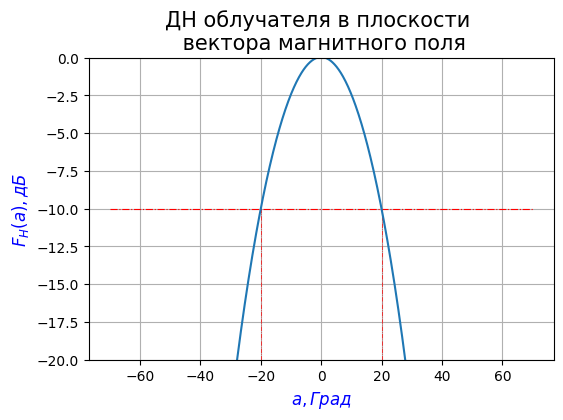

In [ ]:
plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),y_lim_min,dB_for_irradiator,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(dB_for_irradiator,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot(conv_alpha, 20*np.log(np.vectorize(F_H)(alpha,A)), label='$F_E(\alpha)$')



plt.title("ДН облучателя в плоскости \n вектора магнитного поля", fontsize=15)
plt.xlabel('$a, Град$', fontsize=12, color='blue')
plt.ylabel('$F_H(a), дБ$', fontsize=12, color='blue')
#plt.legend()
plt.ylim([y_lim_min,0])
plt.grid(True)
#plt.text(15, 4, 'grow up!')

Рассчитаем длинну рупора по следующей формуле.

$$ {{B^2 + A^2}\over{R_0}} \frac{\pi}{4\lambda} = \pi/2 $$

In [ ]:
R_horn = (A**2 + B**2)/(2*lambda_lim) 
IPython.display.Markdown("$\huge R_0 =  {{A^2 + B^2}\over{2 \cdot \lambda}} =   %i . %i [м] $"%(R_horn,R_horn*1e3%1e3))

$\huge R_0 =  {{A^2 + B^2}\over{2 \cdot \lambda}} =   0 . 131 [м] $

# Расчет ДН антенны

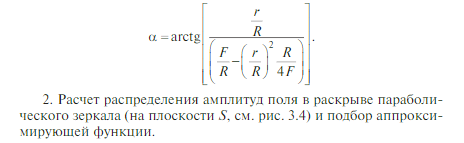

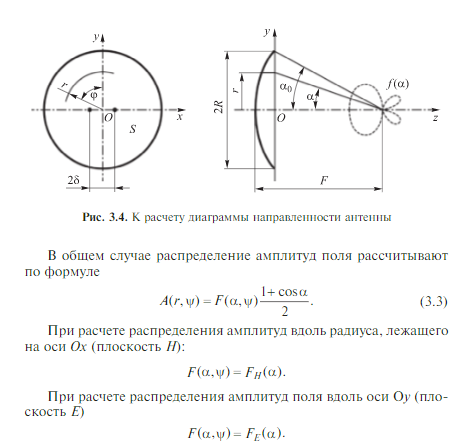

In [ ]:
#F_E = lambda alpha: F_E(alpha,B)
#F_H = lambda alpha: F_H(alpha,A)

In [ ]:
R = D_0/2
F_ = F_eqv
alpha = lambda r: atan((r/R)/(F_/R - (r/R)**2*R/(4*F_)))
A_E = lambda r: (1 + cos(alpha(r)))/4*F_E(alpha(r),B)
A_H = lambda r: (1 + cos(alpha(r)))/4*F_H(alpha(r),A)
#A = lambda r: A_E(r) + A_H(r) 
r = np.linspace(-R,R,1000)

In [ ]:
data_A_E = list(map(A_E,r))
data_A_H = list(map(A_H,r))

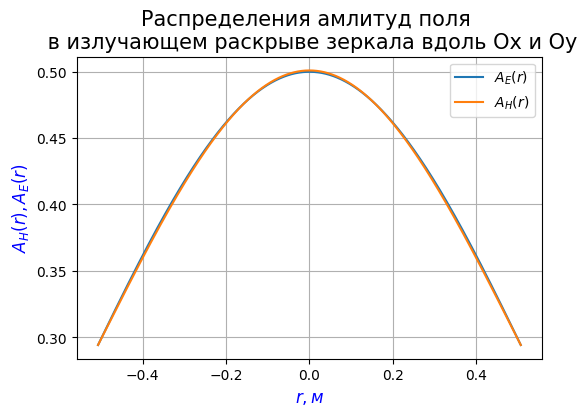

In [ ]:
plt.figure(dpi=100,figsize=(6,4))
plt.plot(r, data_A_E, label='$A_E(r)$')
plt.plot(r, data_A_H, label='$A_H(r)$')
plt.title("Распределения амлитуд поля \n в излучающем раскрыве зеркала вдоль Ox и Оу", fontsize=15)
plt.xlabel('$r,м$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$A_H(r),A_E(r)$', fontsize=12, color='blue')
plt.grid(True)

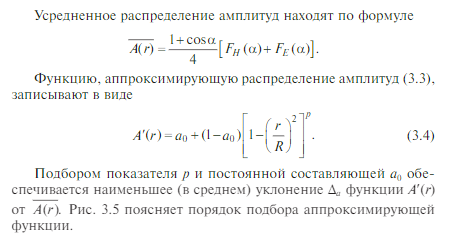

In [ ]:
data_A_E = np.array(data_A_E)
data_A_H = np.array(data_A_H)
data_A = data_A_E + data_A_H
#len(data_A),len(r)

In [ ]:
a_0 = A_E(R) + A_H(R)
A_prime = lambda r,p: a_0 + (1 - a_0)*(1 - (r/R)**2)**p
#opt_A_prime = lambda x,a: A_prime(x,a)
#min_func = lambda p: data_A - np.array([A_prime(p,i) for i in r])
#min_func = lambda p: data_A -  a_0 + (1 - a_0)*p
p = opt.curve_fit(A_prime,r,data_A)
#min_func(1)
#round(p[0][0],0)
p #1.12761
#1.9
p = [[1.17603]]

In [ ]:
IPython.display.Markdown(f"$\huge p = {p[0][0]}$")

$\huge p = 1.17603$

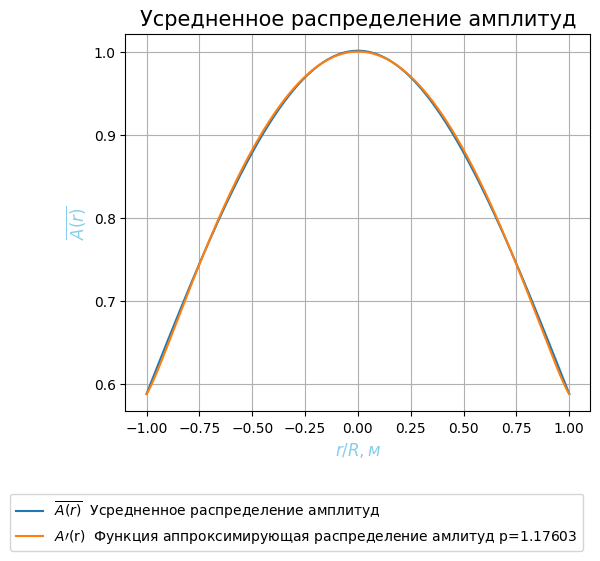

In [ ]:
plt.figure(figsize=(6,5),dpi = 100)
plt.plot(r/R, data_A, label='$\overline{A(r)}$  Усредненное распределение амплитуд')
#plt.plot(r/R, A_prime(r,round(p[0][0],0)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],0)}')
plt.plot(r/R, A_prime(r,round(p[0][0],5)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],5)}')
#plt.plot(r/R, A_prime(r,2), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={2}')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R,м$', fontsize=12, color='skyblue')
plt.legend(bbox_to_anchor=(1, -0.2))
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='skyblue')
plt.grid(True)

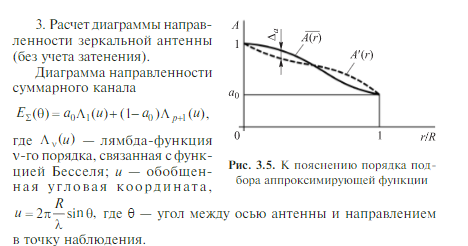

In [ ]:
lmbda = lambda nu,u: round(abs(sp.lmbda(nu,u)[0][int(nu)]*1e3),5) #лямбда функция
u = lambda theta: 2*pi*R/lambda_lim*sin(theta) #обобшенная угловая координата
E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda((round(p[0][0],5) + 1),u(theta))#ДН суммарного канала
#E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(int(2),u(theta))#ДН суммарного канала

In [ ]:
theta = np.linspace(radians(-20), radians(20),1000)
data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))
data_E_sum_theta = data_E_sum_theta - max(data_E_sum_theta)


theta = np.array(list(map(degrees,theta)))#конвертация радиан в градусы

$$ A_E = \frac{1 + cos(\alpha)}{4} \cdot F_E(\alpha)$$
$$ A_H = \frac{1 + cos(\alpha)}{4} \cdot F_H(\alpha)$$
$$ a_0 = A_E(r) + A_H(r) $$
$$ E_{\sum}(Θ) = a_0\Lambda_1(u) + (1 - a_0)\Lambda_{p + 1}(u)$$

In [ ]:
for i in range(len(data_E_sum_theta)):
  if data_E_sum_theta[i] < -15:
   data_E_sum_theta[i] -=2
#int(0.5)
#theta = np.linspace(radians(-20), radians(20),1000)
#E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda((round(p[0][0],5)),u(theta))#ДН суммарного канала
#data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))
#data_E_sum_theta
#lmbda(4,10)
#sp.lmbda(4,7.8)

$$ \lambda = \lambda $$

In [ ]:
#расчет УБЛ
peaks, _ = sig.find_peaks(data_E_sum_theta,
                          width = 10,
                          )
#results_half = sig.peak_widths(data_E_sum_theta, peaks, rel_height=0.5)
#results_full = sig.peak_widths(data_E_sum_theta, peaks, rel_height=0.5)
#list(map(int,results_half[3]))2

level_side_lobes = np.argmax(data_E_sum_theta[peaks])
level_side_lobes = np.delete(data_E_sum_theta[peaks], level_side_lobes)
level_side_lobes = max(level_side_lobes)
level_side_lobes

-21.26893943313207

In [ ]:
#data_E_sum_theta

In [ ]:
#расчет ширины ДН по уровню 0.5

RP_width_05_eq = lambda theta: 20*log10(E_sum_theta(theta)/E_sum_theta(0)) + 5
RP_width_05 = []
RP_width_05.append(opt.root(RP_width_05_eq,radians(0.5),tol = 1e-6)["x"][0])
RP_width_05.append(opt.root(RP_width_05_eq,radians(-0.5))["x"][0])
RP_width_05.sort()
RP_width_05 = np.degrees(RP_width_05)
RP_width_05


array([-2.12609833,  2.12609832])

In [ ]:
#RP_width_05_eq(radians(1.14))
#20*np.log10(E_sum_theta(radians(-2))/E_sum_theta(0)) 

In [ ]:
#(data_E_sum_theta - (-3)) > 1e-30

(-40.0, 0.0)

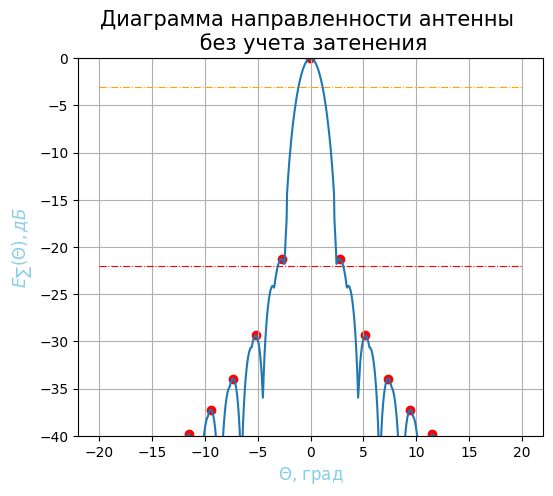

In [ ]:
plt.figure(figsize=(6,5),dpi = 100)

plt.hlines(-22,min(theta),max(theta),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.hlines(-3,min(theta),max(theta),
         color = "orange",
         linestyle = "dashdot",
         linewidth = 0.8,
           )


#plt.hlines(-5,
#    RP_width_05[0],
#    RP_width_05[1],
#    linestyle = "dashdot",
#    linewidth = 0.8,
#          )


plt.plot(theta, data_E_sum_theta, label='$\overline{A(r)}$')
plt.scatter(theta[peaks],
            data_E_sum_theta[peaks],
            color = "red")

#plt.scatter(RP_width_05,
#    [-5,-5],
#          )

plt.title("Диаграмма направленности антенны \n без учета затенения", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='skyblue')
#plt.legend()
plt.ylabel('$E_{\sum}(Θ), дБ$', fontsize=12, color='skyblue')
plt.grid(True)
plt.ylim([-40,0])

In [ ]:
fig = px.line(x=theta, y=data_E_sum_theta,
              labels={'x':'$Θ$, град', 'y':'$E_{\sum}(Θ), дБ$'},
              title="Диаграмма направленности сумарного канала",
              )

fig.add_hline(y=-22,
              line_width=0.5, 
              line_dash="dash", 
              line_color="red")

fig.add_hline(y=-3,
              line_width=0.5, 
              line_dash="dash", 
              line_color="red")

fig.show()

### Расчет ДН антенны с учетом затенения

In [ ]:
a = 0.38 #длинна соеденительной штанги
b = 0.01 #ширина соеденительной штанги
S_sh = const.pi*d_0**2/4 + 3*a*b
S_cl = S - S_sh
d_sh = sqrt(4*S_sh/const.pi)

In [ ]:
#gamma = (0.611 - 0.025)/0.611
#F = lambda aplha:gamma*E_sum_theta(alpha) - (d_sh/D_0)**2*lmbda(1,alpha)*k*d_sh*sin(alpha)

# Расчет КНД

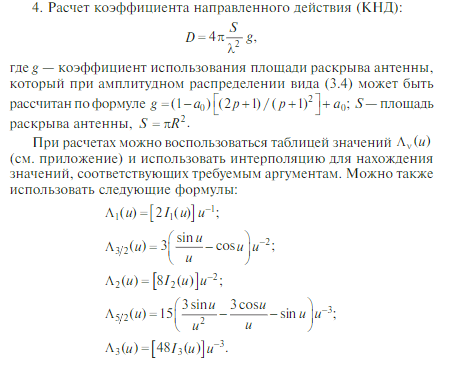

In [ ]:
S = const.pi*R**2
g = (1 - a_0)*(2*p[0][0] + 1)/(p[0][0] + 1)**2 + a_0
D = 4*const.pi*S/lambda_lim**2*g

In [ ]:
#D[0],20*log10(D[0])

In [ ]:
D_0,F_eqv

(1.0136932205624172, 1.4372349831113405)

# Расчет КУ

In [ ]:
eta_1 = 1
eta_2 = scipy.integrate.quad(lambda theta: E_sum_theta(theta)**2*sin(theta),0,radians(15))[1]/scipy.integrate.quad(lambda theta: E_sum_theta(theta)**2*sin(theta),0,const.pi/2)[1]
eta_3 = 0.95
#sigma = (4*const.pi/lambda_lim)**2
#eta_4 = 2*exp(-sigma)
eta_4 = 0.702
eta_5 = 0.99 #нужно проверить какое-то условие
eta_6 = 0.97

Delta = a_0
eta_streak = (1 - (d_0/D_0)**2/(1 - (1 - Delta)/2) )**2
t = 10e-3 #ширина опоры
q = 3 #число опор
eta_doble_streak = (1 - 2*q*t/(const.pi*D_0)*((1 - Delta)/3)/((1 - Delta)/2))**2

g_1 = eta_streak*eta_doble_streak
g_2 = 0.917

G = eta_1*eta_2*eta_3*eta_4*eta_5*eta_6*g_1*g_2*4*const.pi*S/lambda_lim**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



In [ ]:
IPython.display.Markdown(f"$\huge \Delta = {round(Delta,3)}; D_0 = {round(D_0,3)} [м]; q = {q}; t = {t} [м]$")

$\huge \Delta = 0.588; D_0 = 1.014 [м]; q = 3; t = 0.01 [м]$

In [ ]:
IPython.display.Markdown(f"$\huge \eta^\prime  = {round(eta_streak,3)} \space и  \space \eta\prime\prime = {round(eta_doble_streak,3)}$")

$\huge \eta^\prime  = 0.918 \space и  \space \eta\prime\prime = 0.975$

In [ ]:
IPython.display.Markdown("$\huge g_1 = \eta^\prime \cdot \eta^{\prime\prime} =   %i . %i $"%(g_1,g_1*1e3%1e3))

$\huge g_1 = \eta^\prime \cdot \eta^{\prime\prime} =   0 . 894 $

In [ ]:
IPython.display.Markdown(f"$\huge G = {round(G,3)} [раз] = {round(10*log(G),3)} [дБ] $")

$\huge G = 62.757 [раз] = 41.393 [дБ] $

# Данные для конструирования

In [ ]:
import pandas as pd
pd.DataFrame({"F":[F],
             "f":[f],
             "R_0":[D_0/2],
             "r_0":[d_0/2],
             "varphi_2":[varphi_2],
             "psi_0":[psi_0],
              "f_eqv":[focus_of_eqv_mirror],
              })
             

,F,f,R_0,r_0,varphi_2,psi_0,f_eqv
0,0.257885,0.038928,0.506847,0.092546,0.349066,1.553343,0.002003


In [ ]:
pd.DataFrame({"f":[f_lim],
             "КУ":[G],
             "УБЛ":[level_side_lobes],
              })

,f,КУ,УБЛ
0,8.400000e+09,62.757065,-21.268939
